# Data Analysis Notebooks

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. Scape reviews from Google Play Store
2. Preprocess and clean the data
3. Visualize the results

## Import dependencies

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join('..')))

## Import modules

In [2]:
from src.scraper_reviews import PlayStoreScraper
from src.preprocess_reviews import DataCleaner
from src.config import PATHS

## Data Collection

In [3]:
# Scrape data from Google Play Store
scraper = PlayStoreScraper(count=500)
scraper.scrape()
scraper.save(f"../{PATHS['raw_data']}")

# Load raw data immediately to check counts
df_raw = pd.read_csv(f"../{PATHS['raw_data']}")
print(f"Total Raw Reviews Collected: {len(df_raw)}")
df_raw.head()

Scraping Commercial Bank of Ethiopia (com.combanketh.mobilebanking)...
Fetched 500 reviews.
Scraping Bank of Abyssinia (com.boa.boaMobileBanking)...
Fetched 500 reviews.
Scraping Dashen Bank (com.dashen.dashensuperapp)...
Fetched 500 reviews.
Raw data saved to ../data/raw/reviews_raw.csv
Total Raw Reviews Collected: 1500


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,bank,source
0,70f504ff-daed-40d9-9c89-cc49a95ef659,Abde Semed,https://play-lh.googleusercontent.com/a-/ALV-U...,it's special for me,5,0,5.2.1,2025-11-29 15:54:14,NaN,NaN,5.2.1,Commercial Bank of Ethiopia,Google Play
1,28f229b5-0026-41b9-a1eb-b76e74736f63,TOMIZ Creativity,https://play-lh.googleusercontent.com/a-/ALV-U...,Make it user friendly.,2,0,NaN,2025-11-29 08:17:45,NaN,NaN,NaN,Commercial Bank of Ethiopia,Google Play
2,68d8daea-db47-4e23-a692-755173dea983,Tesfaye Abdi,https://play-lh.googleusercontent.com/a-/ALV-U...,maaliif daddafee install gaafata,3,0,5.2.1,2025-11-28 13:36:32,NaN,NaN,5.2.1,Commercial Bank of Ethiopia,Google Play
3,ee0dbb0e-4eb0-47b5-9874-c37877493f99,Betelhem Kebede,https://play-lh.googleusercontent.com/a/ACg8oc...,good app,5,0,NaN,2025-11-28 11:33:17,NaN,NaN,NaN,Commercial Bank of Ethiopia,Google Play
4,5112423d-e618-44ba-ba49-62677cb76cd6,Gurawaa Dooguu,https://play-lh.googleusercontent.com/a-/ALV-U...,This application is very important and advanta...,5,0,NaN,2025-11-27 23:08:20,NaN,NaN,NaN,Commercial Bank of Ethiopia,Google Play


# Preprocessing

These are the steps that are done:
1. Rename Columns
2. Filter Columns
3. Drop Duplicates & Nulls
4. Normalize Date
5. Save file

In [4]:
cleaner = DataCleaner(f"../{PATHS['raw_data']}")
cleaner.load_data()
clean_df = cleaner.preprocess()
cleaner.save(f"../{PATHS['cleaned_data']}")
display(clean_df.head())
print(clean_df.columns)

Cleaning Complete. Dropped 235 rows.
Cleaned data saved to ../data/processed/reviews_cleaned.csv


,review,rating,date,bank,source
0,it's special for me,5,2025-11-29,Commercial Bank of Ethiopia,Google Play
1,Make it user friendly.,2,2025-11-29,Commercial Bank of Ethiopia,Google Play
2,maaliif daddafee install gaafata,3,2025-11-28,Commercial Bank of Ethiopia,Google Play
3,good app,5,2025-11-28,Commercial Bank of Ethiopia,Google Play
4,This application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia,Google Play


Index(['review', 'rating', 'date', 'bank', 'source'], dtype='object')


# Report table

In [6]:
# 1. Calculate Raw Counts per Bank
raw_counts = df_raw['bank'].value_counts().rename("Raw Reviews Scraped")

# 2. Calculate Cleaned Counts per Bank
clean_counts = clean_df['bank'].value_counts().rename("Final Cleaned Reviews")

# 3. Calculate Average Rating per Bank
avg_ratings = clean_df.groupby('bank')['rating'].mean().round(2).rename("Avg. Rating (Star)")

# 4. Combine into a Summary Table
summary_table = pd.concat([raw_counts, clean_counts, avg_ratings], axis=1)

# Add a Total Row
total_row = pd.DataFrame({
    "Raw Reviews Scraped": [summary_table["Raw Reviews Scraped"].sum()],
    "Final Cleaned Reviews": [summary_table["Final Cleaned Reviews"].sum()],
    "Avg. Rating (Star)": ["--"]
}, index=["TOTAL"])

final_report_table = pd.concat([summary_table, total_row])

# Display the table
print("Copy these numbers into your Interim Report Table:")
display(final_report_table)

Copy these numbers into your Interim Report Table:


,Raw Reviews Scraped,Final Cleaned Reviews,Avg. Rating (Star)
Commercial Bank of Ethiopia,500,403,3.95
Bank of Abyssinia,500,430,3.09
Dashen Bank,500,432,4.02
TOTAL,1500,1265,--


# Visualization

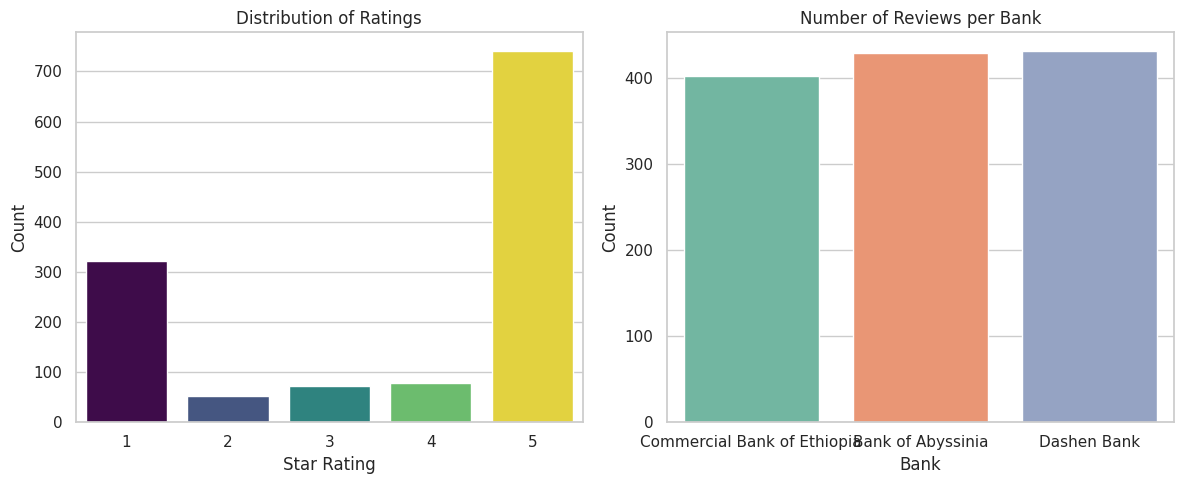

In [7]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=clean_df, palette='viridis', hue="rating", legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank', data=clean_df, palette='Set2', hue="bank", legend=False)
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

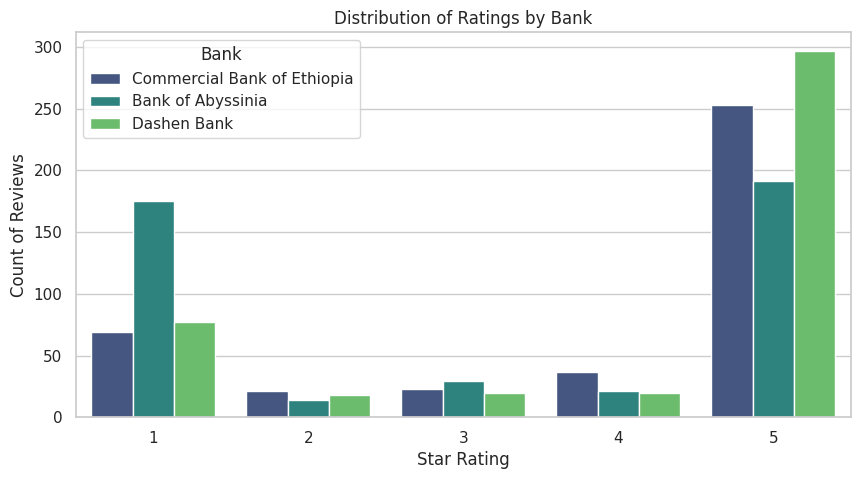

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=clean_df, x='rating', hue='bank', palette='viridis')
plt.title("Distribution of Ratings by Bank")
plt.xlabel("Star Rating")
plt.ylabel("Count of Reviews")
plt.legend(title='Bank')
plt.show()